In [1]:
%load_ext autoreload
%autoreload 2
import torch
import numpy as np
from pathlib import Path
import jutils
from scheduler import DDIMScheduler, DDPMScheduler
from network import UNet
from torchvision.transforms.functional import to_pil_image, to_tensor
from dataset import AFHQDataset, AFHQDataModule
from model import DiffusionModule
from dataset import tensor_to_pil_image

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [41]:
ckpt = torch.load("results/afhq-diffusion-07-04-093904/last.ckpt", map_location="cpu")

In [43]:
ds_module = AFHQDataModule()

In [44]:
ds_module.num_classes

3

In [12]:
device = "cuda:0"

var_scheduler = DDIMScheduler(
    1000, 1e-4, 0.02, "linear"
)

net = UNet(
    T=1000,
    ch=128,
    ch_mult=[1,2,2,2],
    attn=[1],
    num_res_blocks=4,
    dropout=0.1,
    use_cfg=True,
    cfg_dropout=0.1,
    num_classes=3
)

ddpm = DiffusionModule(net, var_scheduler)
# ddpm.load_state_dict(ckpt)
ddpm.load("test.ckpt")
ddpm = ddpm.to(device)
ddpm.eval()
print("done")

done


In [14]:
ddpm.image_resolution

64

In [134]:
var_scheduler.set_timesteps(20)

In [148]:
class_label = torch.tensor([1,1,2,2,3,3])
# samples = ddpm.sample(6, class_label=class_label, guidance_scale=7.5, image_resolution=64)
samples = ddpm.sample(6, image_resolution=64)

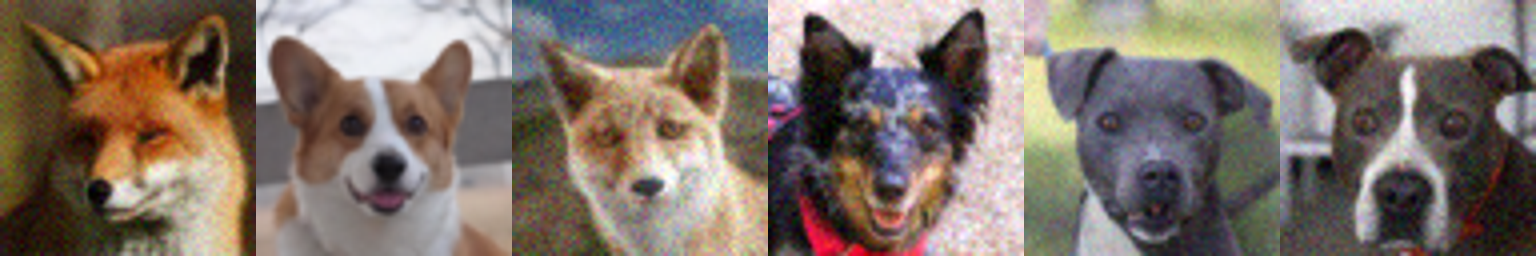

In [149]:
jutils.imageutil.merge_images(
    [tensor_to_pil_image(samples[i]).resize((256,256)) for i in range(6)]
)

In [110]:
hparams = {
    "network": ddpm.network,
    "var_scheduler": ddpm.var_scheduler,
    "image_resolution
}

torch.save(hparams, f"test.ckpt")

In [8]:
hparams_load = torch.load("test.ckpt")

In [10]:
hparams_load['hparams']["network"].image_resolution = 64

In [11]:
torch.save(hparams_load, "test.ckpt")